In [1]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model
import pickle # saving and loading trained model
from os import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# Training and Testing (Binary Classification)

In [2]:
bin_data = pd.read_csv('datasets/bin_data.csv')
bin_data.drop(bin_data.columns[0],axis=1,inplace=True)
le1_classes_ = np.load('le1_classes.npy',allow_pickle=True)

In [3]:
X = bin_data.iloc[:,0:93].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data['intrusion'] # target attribute

In [4]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

# KNN (Binary Classification)

In [5]:
# importing library for K-neares-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier

In [6]:
knn_dict={}
knn_bin_acc_score_list=[]
for i in range(5,16):
    knn=KNeighborsClassifier(n_neighbors=i)
    print("\n\nFor {} Number of Neighbours".format(i))
    start_time = time.time()
    knn.fit(X_train,y_train) # training model on training dataset
    end_time = time.time()
    print("Training time: ", end_time-start_time)
    start_time = time.time()
    y_pred=knn.predict(X_test) # predicting target attribute on testing dataset
    end_time = time.time()
    print("Testing time: ", end_time-start_time)
    knn_bin_acc_score=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
    knn_bin_acc_score_list.append( knn_bin_acc_score)
    print("KNN-Classifier Binary Set-Accuracy is ", knn_bin_acc_score)
    knn_dict[i]=np.mean(y_pred != y_test)
print(knn_dict)
    




For 5 Number of Neighbours
Training time:  0.054538726806640625
Testing time:  140.53263688087463
KNN-Classifier Binary Set-Accuracy is  98.56798120276878


For 6 Number of Neighbours
Training time:  0.030541658401489258
Testing time:  139.97447228431702
KNN-Classifier Binary Set-Accuracy is  98.50447704324633


For 7 Number of Neighbours
Training time:  0.03000330924987793
Testing time:  140.06004786491394
KNN-Classifier Binary Set-Accuracy is  98.59655807455388


For 8 Number of Neighbours
Training time:  0.03611636161804199
Testing time:  127.25890278816223
KNN-Classifier Binary Set-Accuracy is  98.54257953895981


For 9 Number of Neighbours
Training time:  0.01795482635498047
Testing time:  73.62143611907959
KNN-Classifier Binary Set-Accuracy is  98.56163078681654


For 10 Number of Neighbours
Training time:  0.015646934509277344
Testing time:  69.87210750579834
KNN-Classifier Binary Set-Accuracy is  98.52035308312695


For 11 Number of Neighbours
Training time:  0.01562166213989

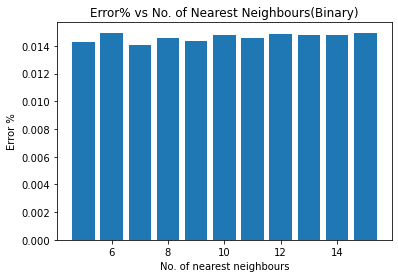

Minimum error: 0.014034419254461167 at K = 7


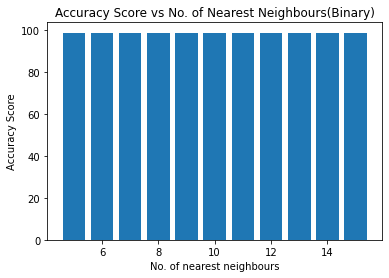

Accuracy Score: 98.59655807455388 at K = 7


In [9]:
nearest_neighbours = list(knn_dict.keys())
error = list(knn_dict.values())
plt.bar(nearest_neighbours, error)
plt.xlabel("No. of nearest neighbours")
plt.ylabel("Error %")
plt.title("Error% vs No. of Nearest Neighbours(Binary)")
plt.show()
optimal_neighbour=error.index(min(error))
print("Minimum error:",min(error),"at K =",nearest_neighbours[optimal_neighbour])
plt.bar(nearest_neighbours, knn_bin_acc_score_list)
plt.xlabel("No. of nearest neighbours")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score vs No. of Nearest Neighbours(Binary)")
plt.show()
print("Accuracy Score:",knn_bin_acc_score_list[optimal_neighbour],"at K =",nearest_neighbours[optimal_neighbour])
knn_ac=knn_bin_acc_score_list[optimal_neighbour]

# LSVM (Binary Classfication)

In [10]:
from sklearn.svm import SVC

In [11]:
# using kernel as linear 
lsvm = SVC(kernel='linear',gamma='auto') 
start_time = time.time()
lsvm.fit(X_train, y_train)
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  232.31767582893372


In [12]:
start_time = time.time()
y_pred = lsvm.predict(X_test) # predicting target attribute on testing dataset
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  11.444276094436646


In [13]:
print("Train score is:", lsvm.score(X_train, y_train))
print("Test score is:", lsvm.score(X_test, y_test))

Train score is: 0.9670614633939817
Test score is: 0.9669778370483266


In [14]:
lsvm_ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("LSVM-Classifier Binary Set-Accuracy is ", lsvm_ac)

LSVM-Classifier Binary Set-Accuracy is  96.69778370483266


# Random Forest (Binary Classfication)

In [15]:
from sklearn.ensemble import RandomForestClassifier

rfv = RandomForestClassifier(n_estimators=30)
start_timeRF = time.time()
rfv.fit(X_train, y_train)
end_timeRF = time.time()
print("Training Time of Random Forest is: ", end_timeRF - start_timeRF)

Training Time of Random Forest is:  3.5127363204956055


In [16]:
start_time = time.time()
y_pred=rfv.predict(X_test) 
end_time = time.time()
print("Testing time of Random Forest is:: ", end_time-start_time)

Testing time of Random Forest is::  0.1270592212677002


In [17]:
rf_ac=accuracy_score(y_test, y_pred)*100
print("Accuracy score of Random Forest is:", rf_ac)

Accuracy score of Random Forest is: 98.70451514574205


# Gaussian Naive Bayes (Binary Classfication)

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()
start_time = time.time()
gnb.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  0.194990873336792


In [19]:
start_time = time.time()
y_pred = gnb.predict(X_test) # predicting target attribute on testing dataset
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.08576679229736328


In [20]:
print("Train score is:", gnb.score(X_train, y_train))
print("Test score is:", gnb.score(X_test, y_test))

Train score is: 0.8442722721451328
Test score is: 0.8432717342985966


In [21]:
gnb_ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("GaussianNaiveBayes-Classifier Binary Set-Accuracy is ", gnb_ac)

GaussianNaiveBayes-Classifier Binary Set-Accuracy is  84.32717342985966


# Decision Tree (Binary Classfication)

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
start_time = time.time()
dt.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  0.7130739688873291


In [23]:
start_time = time.time()
y_pred = dt.predict(X_test) # predicting target attribute on testing dataset
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.014960765838623047


In [24]:
print("Train score is:", dt.score(X_train, y_train))
print("Test score is:", dt.score(X_test, y_test))

Train score is: 0.9591231913970301
Test score is: 0.9583412713532736


In [25]:
dt_ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("DecisionTree-Classifier Binary Set-Accuracy is ", dt_ac)

DecisionTree-Classifier Binary Set-Accuracy is  95.83412713532736


# Logistic Regression (Binary Classfication)

In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 1200000)
start_time = time.time()
lr.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  4.894774436950684


In [27]:
start_time = time.time()
y_pred = lr.predict(X_test) # predicting target attribute on testing dataset
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.015619039535522461


In [28]:
print("Train score is:", lr.score(X_train, y_train))
print("Test score is:", lr.score(X_test, y_test))

Train score is: 0.9700145005768478
Test score is: 0.969708515907792


In [29]:
lr_ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("LogisticRegression-Classifier Binary Set-Accuracy is ", lr_ac)

LogisticRegression-Classifier Binary Set-Accuracy is  96.97085159077919


# Comparision (Binary Classfication)

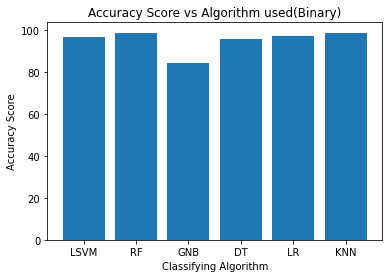

In [30]:
names = ['LSVM', 'RF', 'GNB', 'DT', 'LR','KNN']
values = [lsvm_ac,rf_ac,gnb_ac,dt_ac,lr_ac,knn_ac]
plt.bar(names, values)
plt.xlabel("Classifying Algorithm")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score vs Algorithm used(Binary)")
plt.show()

# Training and Testing (Multi-class Classification)

In [31]:
multi_data = pd.read_csv('datasets/multi_data.csv')
multi_data.drop(multi_data.columns[0],axis=1,inplace=True)
le2_classes_ = np.load('le2_classes.npy',allow_pickle=True)

In [32]:
X = multi_data.iloc[:,0:93].to_numpy()
Y = multi_data['intrusion'] # target attribute
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

# KNN (Multi-class Classification)

In [33]:
knn_dict={}
knn_multi_acc_score_list=[]
for i in range(5,16):
    knn=KNeighborsClassifier(n_neighbors=i)
    print("\n\nFor {} Number of Neighbours".format(i))
    start_time = time.time()
    knn.fit(X_train,y_train) # training model on training dataset
    end_time = time.time()
    print("Training time: ", end_time-start_time)
    start_time = time.time()
    y_pred=knn.predict(X_test)
    end_time = time.time()
    print("Testing time: ", end_time-start_time)
    knn_multi_acc_score=accuracy_score(y_test, y_pred)*100
    knn_multi_acc_score_list.append( knn_multi_acc_score)
    print("KNN-Classifier Multi-class Set-Accuracy is ",knn_multi_acc_score)
    knn_dict[i]=np.mean(y_pred != y_test)    
print(knn_dict)



For 5 Number of Neighbours
Training time:  0.019990205764770508
Testing time:  71.13731646537781
KNN-Classifier Multi-class Set-Accuracy is  98.2599860290849


For 6 Number of Neighbours
Training time:  0.015659809112548828
Testing time:  74.80885910987854
KNN-Classifier Multi-class Set-Accuracy is  98.15202895789675


For 7 Number of Neighbours
Training time:  0.01562190055847168
Testing time:  72.06326985359192
KNN-Classifier Multi-class Set-Accuracy is  98.28221248491776


For 8 Number of Neighbours
Training time:  0.015620231628417969
Testing time:  72.76403522491455
KNN-Classifier Multi-class Set-Accuracy is  98.21870832539531


For 9 Number of Neighbours
Training time:  0.015622377395629883
Testing time:  73.01456117630005
KNN-Classifier Multi-class Set-Accuracy is  98.20600749349082


For 10 Number of Neighbours
Training time:  0.015589237213134766
Testing time:  74.50749492645264
KNN-Classifier Multi-class Set-Accuracy is  98.1901314536102


For 11 Number of Neighbours
Traini

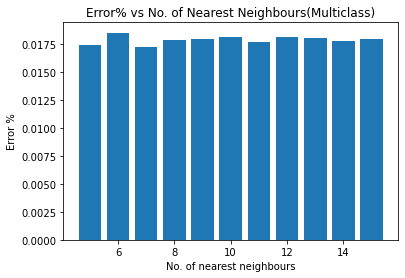

Minimum error: 0.017177875150822378 at K = 7


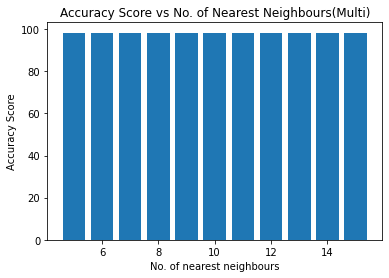

Accuracy Score: 98.28221248491776 at K = 7


In [34]:
nearest_neighbours = list(knn_dict.keys())
error = list(knn_dict.values())
plt.bar(nearest_neighbours, error)
plt.xlabel("No. of nearest neighbours")
plt.ylabel("Error %")
plt.title("Error% vs No. of Nearest Neighbours(Multiclass)")
plt.show()
optimal_neighbour=error.index(min(error))
print("Minimum error:",min(error),"at K =",nearest_neighbours[optimal_neighbour])
plt.bar(nearest_neighbours, knn_multi_acc_score_list)
plt.xlabel("No. of nearest neighbours")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score vs No. of Nearest Neighbours(Multi)")
plt.show()
print("Accuracy Score:",knn_multi_acc_score_list[optimal_neighbour],"at K =",nearest_neighbours[optimal_neighbour])


# Logistic Regression (Multi-class Classification)

In [35]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 1200000,multi_class='multinomial', solver='lbfgs')
start_time = time.time()
lr.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  27.364960432052612


In [36]:
start_time = time.time()
y_pred = lr.predict(X_test)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.013933420181274414


In [37]:
print("Train score is:", lr.score(X_train, y_train))
print("Test score is:", lr.score(X_test, y_test))

Train score is: 0.9549952899586152
Test score is: 0.9542135009843145


In [38]:
lr_ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("LogisticRegression-Classifier Set-Accuracy is ", lr_ac)

LogisticRegression-Classifier Set-Accuracy is  95.42135009843145


# Gaussian Naive-Bayes (Multi-class Classification)

In [39]:
from sklearn.naive_bayes import GaussianNB
start_time = time.time()
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  0.34679150581359863


In [40]:
start_time = time.time()
y_test_pred = gnb.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.5343267917633057


In [41]:
print("Train score is:", gnb.score(X_train, y_train))
print("Test score is:", gnb.score(X_test, y_test))

Train score is: 0.6496681802305274
Test score is: 0.6491395186384709


In [42]:
gnb_ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("GaussianNaiveBayes-Classifier Set-Accuracy is ", gnb_ac)

GaussianNaiveBayes-Classifier Set-Accuracy is  95.42135009843145


# Decision Tree (Multi-class Classification)

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
start_time = time.time()
dt.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  0.5914516448974609


In [44]:
start_time = time.time()
y_pred = dt.predict(X_test)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.013961315155029297


In [45]:
print("Train score is:", dt.score(X_train, y_train))
print("Test score is:", dt.score(X_test, y_test))

Train score is: 0.8963896738957864
Test score is: 0.8959166825427065


In [46]:
dt_ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("DecisionTree-Classifier Set-Accuracy is ", dt_ac)

DecisionTree-Classifier Set-Accuracy is  89.59166825427064


# LSVM (Multi-class Classification)

In [47]:
from sklearn.svm import SVC

In [48]:
lsvm=SVC(kernel='linear',gamma='auto')
lsvm.fit(X_train,y_train) 
start_time = time.time()
lsvm.fit(X_train, y_train)
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  201.61552095413208


In [49]:
start_time = time.time()
y_pred = lsvm.predict(X_test)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  22.26730465888977


In [50]:
print("Train score is:", lsvm.score(X_train, y_train))
print("Test score is:", lsvm.score(X_test, y_test))

Train score is: 0.9538945162417045
Test score is: 0.9524988886772083


In [51]:
lsvm_ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("LSVM-Classifier Set-Accuracy is ", lsvm_ac)

LSVM-Classifier Set-Accuracy is  95.24988886772083


# Random Forest (Multi-class Classification)

In [52]:
from sklearn.ensemble import RandomForestClassifier

rfv = RandomForestClassifier(n_estimators=30, criterion = 'entropy', random_state = 42)
start_timeRF = time.time()
rfv.fit(X_train, y_train)
end_timeRF = time.time()
print("Training Time of Random Forest is: ", end_timeRF - start_timeRF)

Training Time of Random Forest is:  3.5554940700531006


In [53]:
start_time = time.time()
y_pred = rfv.predict(X_test)
end_time = time.time()
print("Testing time of Random Forest is:: ", end_time-start_time)

Testing time of Random Forest is::  0.1583855152130127


In [54]:
rf_ac=accuracy_score(y_test, y_pred)*100
print("Accuracy score of Random Forest is:", rf_ac)

Accuracy score of Random Forest is: 98.469549755509


# Comparison (Multi-class Classification)

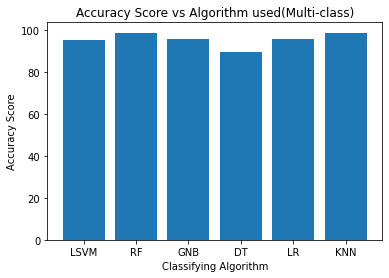

In [55]:
names = ['LSVM', 'RF', 'GNB', 'DT', 'LR','KNN']
values = [lsvm_ac,rf_ac,gnb_ac,dt_ac,lr_ac,knn_ac]
plt.bar(names, values)
plt.xlabel("Classifying Algorithm")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score vs Algorithm used(Multi-class)")
plt.show()